In [21]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC


In [22]:
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) 

In [23]:
iris.frame.head()
## y = 0  → "setosa"
## y = 1  → "versicolor"
## y = 2  → "virginica"


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
svm_clf=make_pipeline(StandardScaler(),LinearSVC(C=1,random_state=42))
svm_clf.fit(X,y)

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


In [25]:
X_new = [[5.5, 1.7], [5.0, 1.5]]


In [26]:
print(svm_clf.predict(X_new))
print(svm_clf.decision_function(X_new))


[ True False]
[ 0.66163816 -0.22035761]


# Nonlinear SVM classification
we add more features by polynomialfeature to help in separating data 

### polynomial features

In [27]:
## lnearSVC + polynomial 
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = make_pipeline(
PolynomialFeatures(degree=3),
StandardScaler(),
LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)


,steps,"[('polynomialfeatures', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [28]:
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_boundary(clf, X, y, title="Decision Boundary"):
    x0s = np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 500)
    x1s = np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 500)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, cmap="bwr", alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.grid(True)
    plt.show()


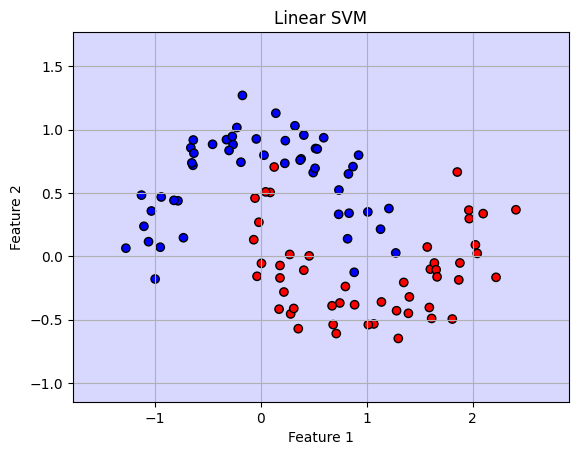

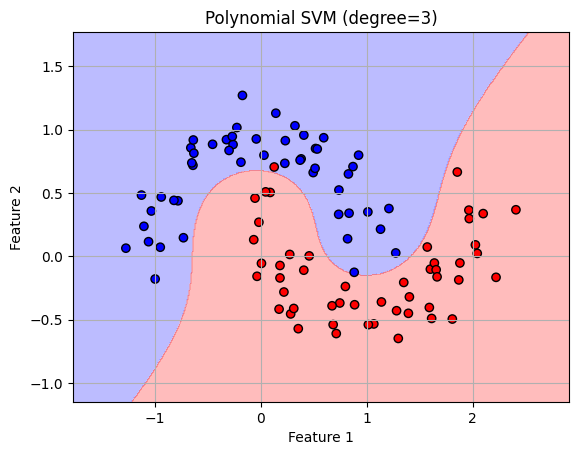

"\n❌ Linear SVM failed because moons data isn't linearly separable.\n✅ We solved it by expanding features using PolynomialFeatures.\n\n"

In [29]:
plot_decision_boundary(svm_clf, X, y, title="Linear SVM")
plot_decision_boundary(polynomial_svm_clf, X, y, title="Polynomial SVM (degree=3)")

"""
❌ Linear SVM failed because moons data isn't linearly separable.
✅ We solved it by expanding features using PolynomialFeatures.

"""


#### polynomail is perfect but it can make tha data more complex and slow down model training so we we use
## Kernel 
the kernel is used with svc while linearSVC is use only linear kernel 

In [30]:
## kernel
from sklearn.svm import SVC

##coef =1 ,degree =3,c=5
poly_kernel_svm_clf1 = make_pipeline(StandardScaler(),
SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf1.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


In [31]:
##coef =100 ,degree =10,c=5
poly_kernel_svm_clf2 = make_pipeline(StandardScaler(),
SVC(kernel="poly", degree=10, coef0=1, C=5))
poly_kernel_svm_clf2.fit(X, y)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,10
,gamma,'scale'


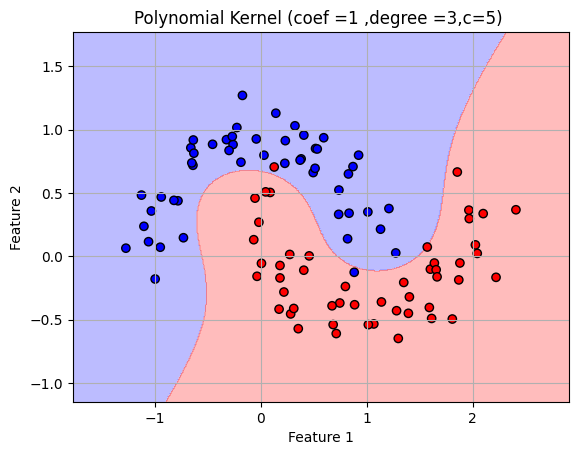

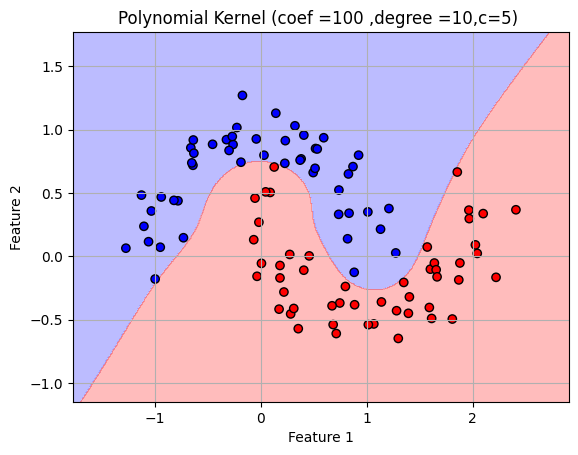

In [32]:
plot_decision_boundary(poly_kernel_svm_clf1,X,y,title="Polynomial Kernel (coef =1 ,degree =3,c=5) ")
plot_decision_boundary(poly_kernel_svm_clf2,X,y,title="Polynomial Kernel (coef =100 ,degree =10,c=5) ")


### Gauissian RBF

In [33]:
rbf_kernel_svm_clf_1=make_pipeline(StandardScaler(),SVC(kernel='rbf',gamma=0.1,C=1))
rbf_kernel_svm_clf_1.fit(X,y)

rbf_kernel_svm_clf_2=make_pipeline(StandardScaler(),SVC(kernel='rbf',gamma=0.1,C=1000))
rbf_kernel_svm_clf_2.fit(X,y)

rbf_kernel_svm_clf_3=make_pipeline(StandardScaler(),SVC(kernel='rbf',gamma=5,C=0.001))
rbf_kernel_svm_clf_3.fit(X,y)

rbf_kernel_svm_clf_4=make_pipeline(StandardScaler(),SVC(kernel='rbf',gamma=5,C=1000))
rbf_kernel_svm_clf_4.fit(X,y)


,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1000
,kernel,'rbf'
,degree,3
,gamma,5


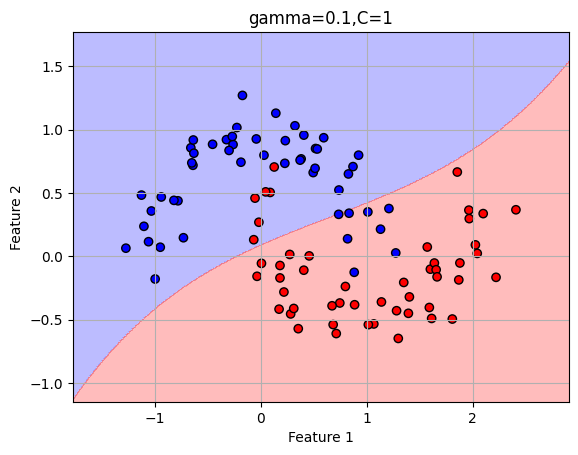

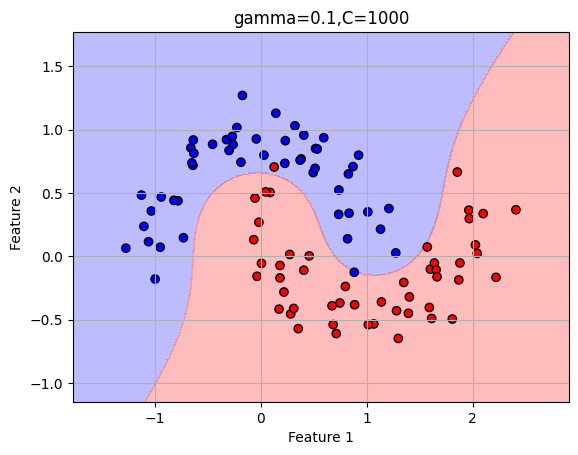

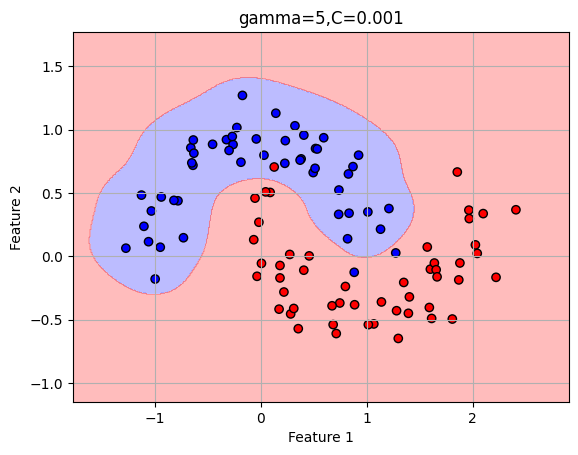

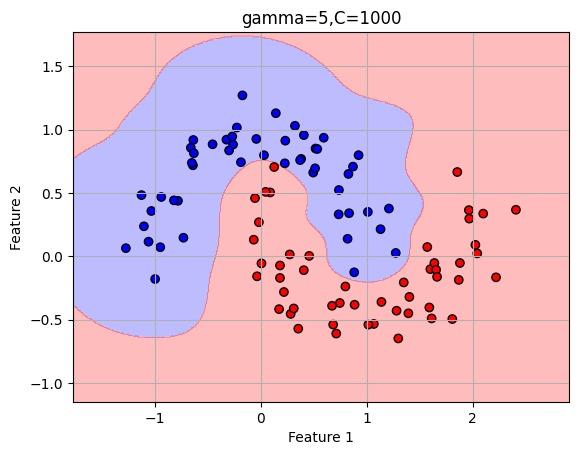

In [34]:
plot_decision_boundary(rbf_kernel_svm_clf_1,X,y,title="gamma=0.1,C=1")
plot_decision_boundary(rbf_kernel_svm_clf_2,X,y,title="gamma=0.1,C=1000")
plot_decision_boundary(rbf_kernel_svm_clf_3,X,y,"gamma=5,C=0.001")
plot_decision_boundary(rbf_kernel_svm_clf_4,X,y,"gamma=5,C=1000")